In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [3]:
df_skills.explode("job_skills")

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [4]:
df_skill_lists = df_skills.copy()       # Create a copy of the original DataFrame

for row in df_skill_lists.itertuples(): # Loop over each row in the DataFrame as a named tuple
    for skill in row.job_skills:        # Loop over each skill in the job_skills list
        df_skill_lists[skill] = df_skill_lists["job_skills"].apply(lambda x: skill in x) # Create 
        # a new column for the skill with True/False if it's present in each row
        df_skill_lists[skill] = df_skill_lists[skill].astype(int) # Convert True/False to 1/0 for 
        # easier analysis and summation

df_skill_lists.loc["Total"] = df_skill_lists.sum() # Add a new row called 'Total' that 
# contains the sum of each column (i.e., total count of each skill)
df_skill_lists.iloc[:, 2:] # Display all rows (including 'Total') and only the skill columns, 
# excluding the first two columns (like job titles or skill lists)

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


In [5]:
df_exploded = df_skills.explode("job_skills")
df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [6]:
df_exploded.value_counts("job_skills")

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

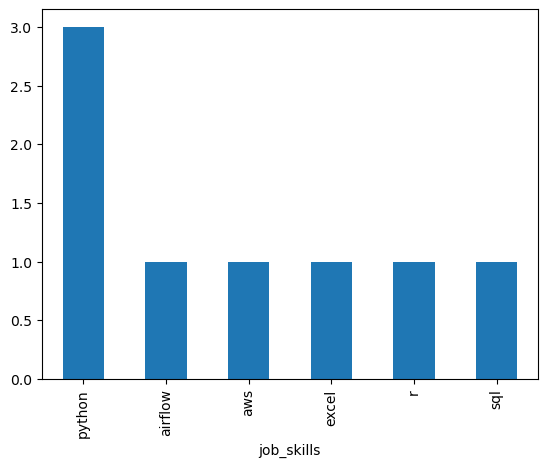

In [7]:
df_exploded.value_counts("job_skills").plot(kind='bar')
plt.show()

In [8]:
df[["job_title_short", "job_skills"]].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [9]:
# Explode 'job_skills' so each skill gets its own row
df_exploded_skills = df.explode("job_skills")

df_exploded_skills["job_skills"]

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

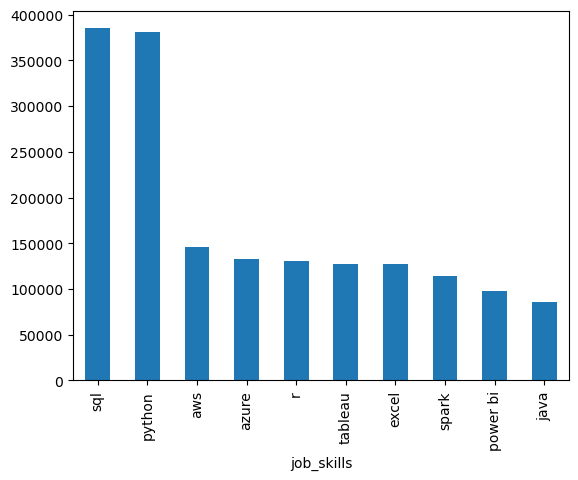

In [10]:
df_exploded_skills["job_skills"].value_counts().head(10).plot(kind='bar')

plt.show()

In [11]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_exploded_skills.groupby(["job_title_short", "job_skills"]).size()
type(skills_count)

pandas.core.series.Series

In [12]:
df_skills_count = skills_count.reset_index(name='skill_count')

In [13]:
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [14]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [20]:
job_title = "Data Scientist"

top_skills = 8

df_skill_final = df_skills_count[df_skills_count["job_title_short"] == job_title].head(top_skills)

df_skill_final

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
1101,Data Scientist,sql,78982
1070,Data Scientist,r,59566
1082,Data Scientist,sas,29534
1113,Data Scientist,tableau,29445
924,Data Scientist,aws,26256
1096,Data Scientist,spark,24286
925,Data Scientist,azure,21664


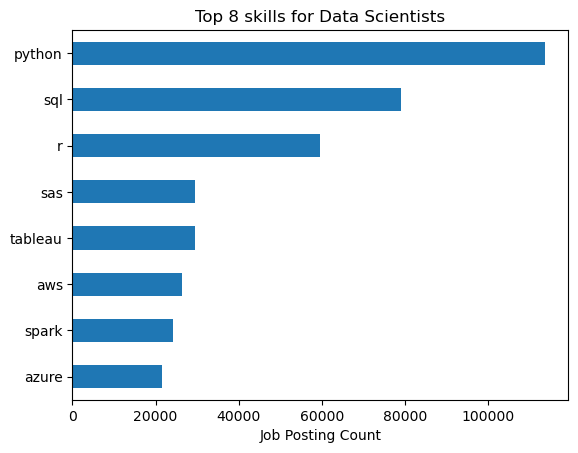

In [21]:
df_skill_final.plot(kind="barh", x="job_skills", y="skill_count")
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_title}s")
plt.xlabel("Job Posting Count")
plt.ylabel("")
# ax.legend(["Skill count"])
plt.legend().set_visible(False)
plt.show()

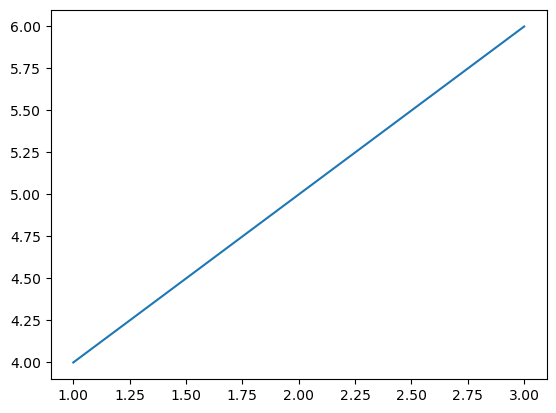

In [35]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])

# Hide the axes
# ax.axis('off')  # Or do this:
# ax.get_xaxis().set_visible(True)
# ax.get_yaxis().set_visible(True)

<BarContainer object of 2 artists>

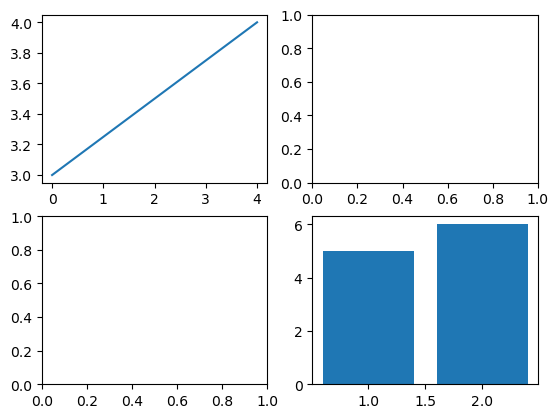

In [69]:
fig, axs = plt.subplots(2, 2)  # 2x2 grid of Axes
axs[0, 0].plot([0, 4], [3, 4])
axs[1, 1].bar([1, 2], [5, 6])